Stability of defection, optimisation of strategies and the limits of memory in the PD.
-----------------------

## 1. Utility and Best responses to memory-one players

In [4]:
import opt_mo
import numpy as np
import sympy as sym

sym.init_printing(pretty_print=False)

In [5]:
from sympy.polys import subresultants_qq_zz

In [6]:
import itertools
import random
import axelrod as axl

from fractions import Fraction

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import matplotlib

In [9]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [10]:
p_1, p_2 = sym.symbols("p_1, p_2")
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")

In [11]:
p = (p_1, p_2, p_1, p_2)
q = (q_1, q_2, q_3, q_4)

Sylvester Example
-------------------

In [115]:
ais = sym.symbols("a0:5")
bis = sym.symbols("b0:4")

x = sym.symbols("x")

f = sum([a * x ** i for i, a in enumerate(ais)])
g = sum([b * x ** i for i, b in enumerate(bis)])

In [121]:
f

a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4

In [122]:
g

b0 + b1*x + b2*x**2 + b3*x**3

In [123]:
matrix = subresultants_qq_zz.sylvester(f, g, x)
matrix

Matrix([
[a4, a3, a2, a1, a0,  0,  0],
[ 0, a4, a3, a2, a1, a0,  0],
[ 0,  0, a4, a3, a2, a1, a0],
[b3, b2, b1, b0,  0,  0,  0],
[ 0, b3, b2, b1, b0,  0,  0],
[ 0,  0, b3, b2, b1, b0,  0],
[ 0,  0,  0, b3, b2, b1, b0]])

Numerical example of Sylvester's matrix
-----------------

In [10]:
p_1 = sym.symbols("p_1")
p_2 = sym.symbols("p_2")


f = p_1 ** 2 + p_1 * p_2 + 2 * p_1 + p_2 - 1
g = p_1 ** 2 + 3 * p_1 - p_2 ** 2 + 2 * p_2 - 1

In [19]:
matrix = subresultants_qq_zz.sylvester(f, g, p_2)
matrix

Matrix([
[p_1 + 1, p_1**2 + 2*p_1 - 1,                  0],
[      0,            p_1 + 1, p_1**2 + 2*p_1 - 1],
[     -1,                  2, p_1**2 + 3*p_1 - 1]])

In [20]:
matrix.det().factor()

-p_1*(p_1 - 1)*(p_1 + 3)

In [17]:
f.subs({p_1: 1})

In [16]:
from sympy.polys.multivariate_resultants import DixonResultant

p_1, p_2 = sym.symbols("p_1, p_2")

In [17]:
f = p_1 + p_2
g = p_1 ** 2 + p_2 ** 3
h = p_1 ** 2 + p_2

In [25]:
dixon = DixonResultant(variables=[p_1, p_2], polynomials=[f, g, h])

In [26]:
poly = dixon.get_dixon_polynomial()

In [27]:
matrix = dixon.get_dixon_matrix(polynomial=poly)
matrix

Matrix([
[ 0,  0, -1,  0, -1],
[ 0, -1,  0, -1,  0],
[-1,  0,  1,  0,  0],
[ 0, -1,  0,  0,  1],
[-1,  0,  0,  1,  0]])

In [28]:
matrix.det()

0

Reactive Strategies
--------------------

In [2]:
import opt_mo

//anaconda3/envs/opt-mo/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [138]:
solutions = []

for i in range(40):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]

    solutions.append(opt_mo.get_reactive_best_response(opponents))

In [176]:
def plot_argmax(opponents, solution, filename):
    p_1, p_2 = sym.symbols("p_1, p_2")
    p = (p_1, p_2, p_1, p_2)

    p_one, p_two = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
    utility = opt_mo.tournament_utility(p, opponents)

    expr = sym.lambdify((p_1, p_2), utility.simplify())

    plt.figure()
    X, Y = np.meshgrid(p_one, p_two)
    Z = expr(X, Y)

    plt.contourf(X, Y, Z)
    plt.colorbar()
    plt.plot(
        solution[0],
        solution[1],
        marker="x",
        color="r",
        markersize=20,
        markeredgewidth=5,
    )
    plt.ylabel(r"$p_2$")
    plt.xlabel(r"$p_1$")
    plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


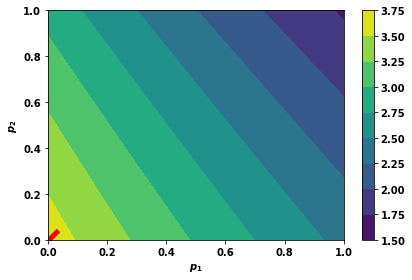

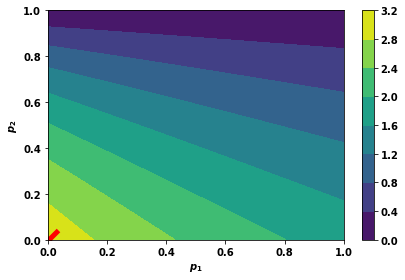

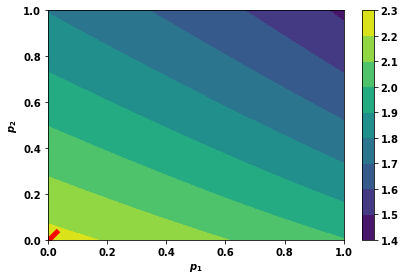

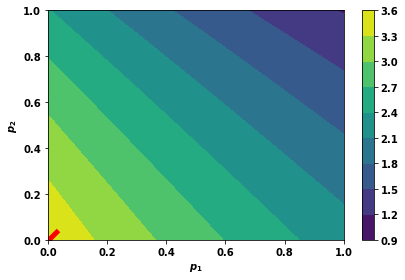

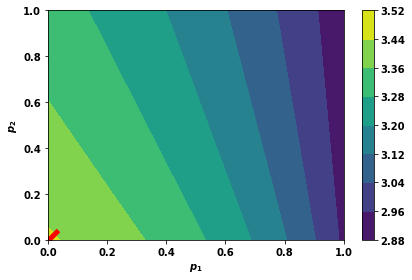

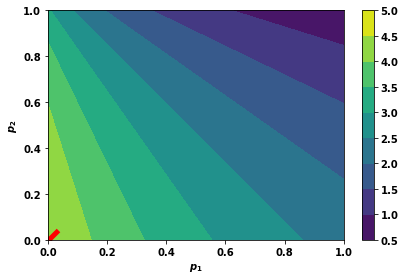

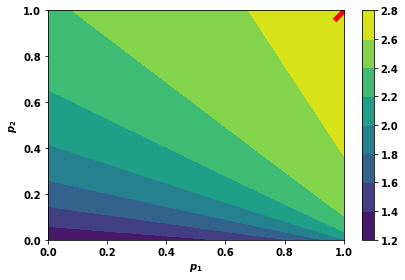

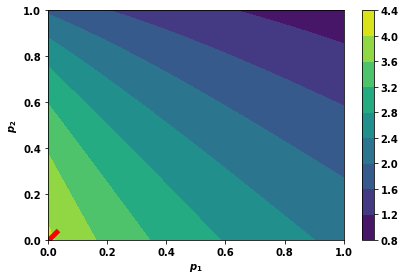

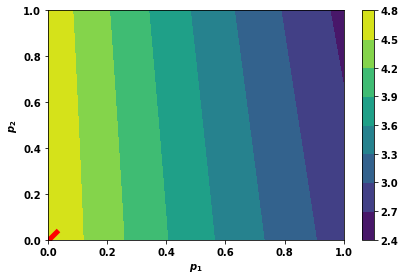

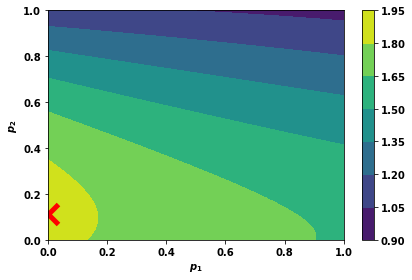

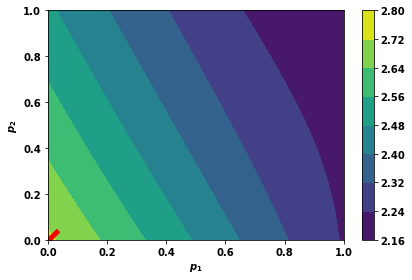

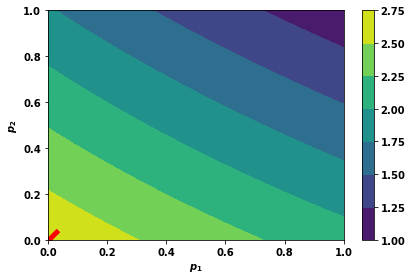

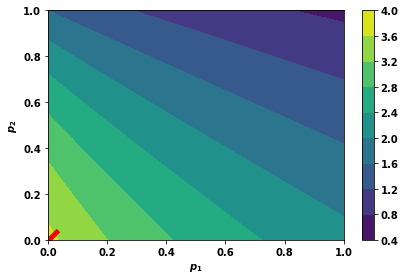

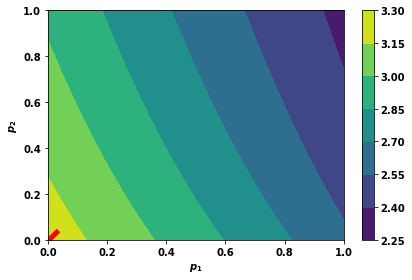

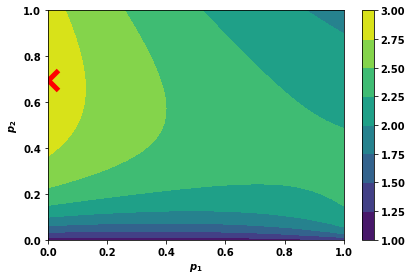

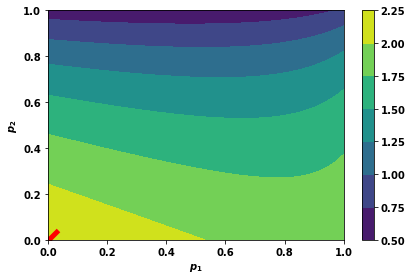

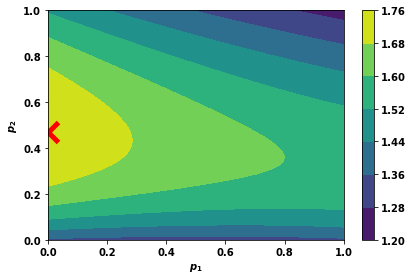

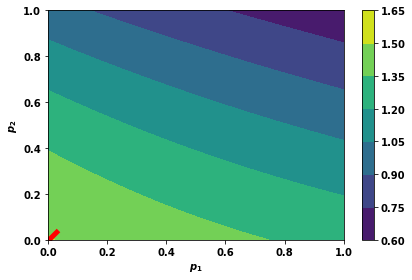

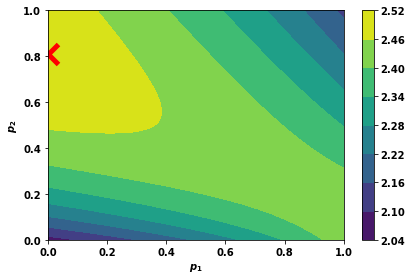

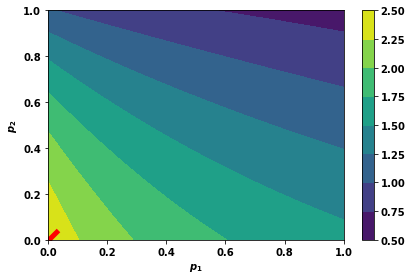

In [143]:
for i in range(20):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]

    plot_argmax(
        opponents, solutions[i], "../img/reactive/reactive_pairwise_{}.pdf".format(i)
    )

In [12]:
axl.seed(14)
opponent = [np.random.random(4)]
opt_mo.get_reactive_best_response(opponent)

array([0.        , 0.69647319, 0.        , 0.69647319])

In [13]:
opponent

[array([0.51394334, 0.77316505, 0.87042769, 0.00804695])]

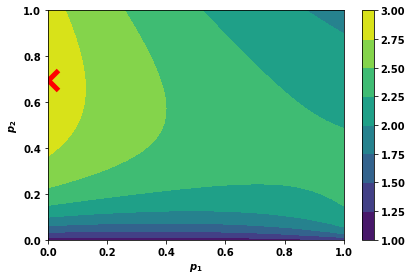

In [178]:
plot_argmax(
    opponent,
    opt_mo.reactive_best_response.get_argmax(opponents, candinate_set),
    "reactive_best_response.pdf",
)

In [171]:
opponent

[array([0.51394334, 0.77316505, 0.87042769, 0.00804695])]

In [1]:
>>> import opt_mo
>>> import numpy as np
>>> import axelrod as axl

>>> axl.seed(14)
>>> opponent = [np.random.random(4)]
>>> opponent

//anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
//anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[array([0.51394334, 0.77316505, 0.87042769, 0.00804695])]

In [2]:
opt_mo.reactive_best_response.get_candinate_reactive_best_responses?

In [3]:
candinate_set = opt_mo.reactive_best_response.get_candinate_reactive_best_responses(
    opponent
)

In [6]:
opt_p1, opt_p2, score = opt_mo.reactive_best_response.get_argmax(
    opponent, candinate_set
)

In [7]:
opt_p1, opt_p2

(0, 0.6964731896521483)

In [158]:
sym.latex(opt_mo.match_utility(p, opponents[0]).factor())

'\\frac{4.04240903607593 \\left(0.052861042015304 p_{1}^{2} + 0.0584229115422393 p_{1} p_{2} - 0.0140015754249488 p_{1} + 0.353519816316479 p_{2}^{2} - 1.0 p_{2} - 0.0625685742089841\\right)}{0.211710465411301 p_{1}^{2} - 0.423420930822603 p_{1} p_{2} - 0.0622111572797162 p_{1} + 0.211710465411301 p_{2}^{2} - 1.0 p_{2} - 0.222444389322978}'

In [159]:
example_utility = opt_mo.match_utility(p, opponents[0]).factor()

In [160]:
diffs = [sym.diff(example_utility, i) for i in [p_1, p_2]]

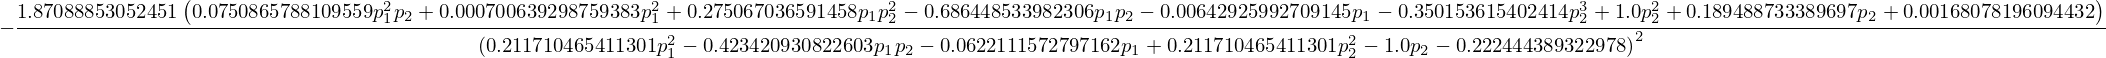

In [162]:
diffs[0].factor()

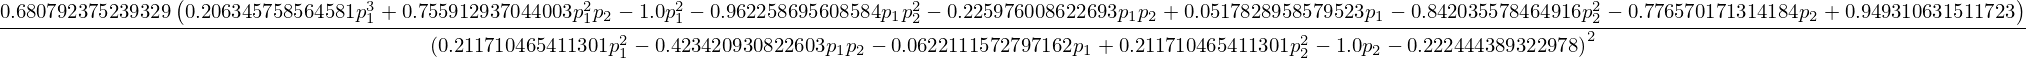

In [163]:
diffs[1].factor()